

## <center>Houmaan chamani *--------------------* 810196443</center>

---

# <center> Signal and systems CA1 </center>

## **First question**

**Part 1:**
Implementation of step and ramp signals are provided below. Sampling is carried out using the numpy library of python in simultaneous intervals.(-1 to 1 for example). After that there are three sampling functions responsible for providing the "y" and "x" values of our plots. At last, ramp and step functions are both drawen with frequncies 10 and 100.


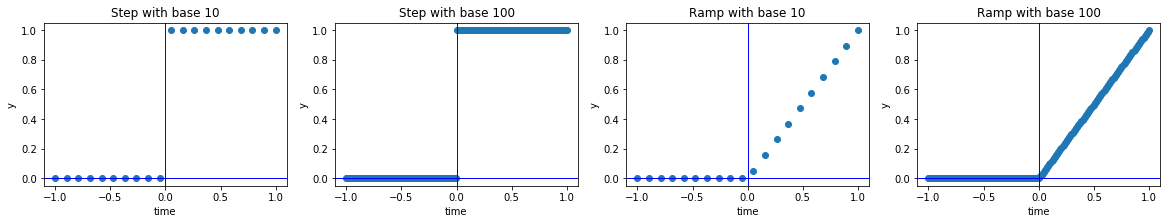

In [2]:
import matplotlib.pyplot as drawer
import numpy as np

def draw_plot(drawer, x_axis, y_axis, title, xlabel, ylabel):
  drawer.plot(x_axis, y_axis, 'o')
  drawer.title(title)
  drawer.xlabel(xlabel)
  drawer.ylabel(ylabel)
  drawer.axhline(linewidth=1, color='b')
  drawer.axvline(linewidth=1, color='b')

def special_plot(drawer, x_axis, y_axis, title, xlabel, ylabel):
  drawer.plot(x_axis, y_axis, '-o')
  drawer.title(title)
  drawer.xlabel(xlabel)
  drawer.ylabel(ylabel)
  drawer.axhline(linewidth=1, color='b')
  drawer.axvline(linewidth=1, color='b')  


def step(inp):
    return int(inp>=0)


def ramp(inp):
    if(inp >= 0):
        return inp
    return 0


def step_sample(frequency, interval):
    raw_x = list(np.linspace(-interval, interval, 2*frequency))
    return raw_x, list(map(step, raw_x))

def ramp_sample(frequency, interval):
    raw_x = np.linspace(-interval, interval, 2*frequency)
    return raw_x, list(map(ramp, raw_x))

def special_sample(f, frequency, interval):
    raw_x=np.linspace(-interval, interval, 2*frequency)
    return raw_x, list(map(f, raw_x))

def special_sample_5(f, rate, s_range):
    raw_x=list(range(rate,s_range))
    return raw_x, list(map(f, raw_x))   


drawer.figure(figsize=(20, 3))

step_x, step_y = step_sample(10, 1)
drawer.subplot(1, 4, 1)
draw_plot(drawer, step_x, step_y, "Step with base 10", "time", "y")

step_x, step_y = step_sample(100, 1) 
drawer.subplot(1, 4, 2)
draw_plot(drawer, step_x, step_y, "Step with base 100", "time", "y")

ramp_x, ramp_y = ramp_sample(10, 1) 
drawer.subplot(1, 4, 3)
draw_plot(drawer, ramp_x, ramp_y, "Ramp with base 10", "time", "y")

ramp_x, ramp_y = ramp_sample(100, 1) 
drawer.subplot(1, 4, 4)
draw_plot(drawer, ramp_x, ramp_y, "Ramp with base 100", "time", "y")

**Part 2:**
X(t) function is calculated here. Note that the interval is considered as (-4,4), same as the plot represented in the documentation.
The formula for x(t) is [ -ramp(t+2) + 3 * ramp(t+1) - 2 * ramp(t) - step(t-2) ]


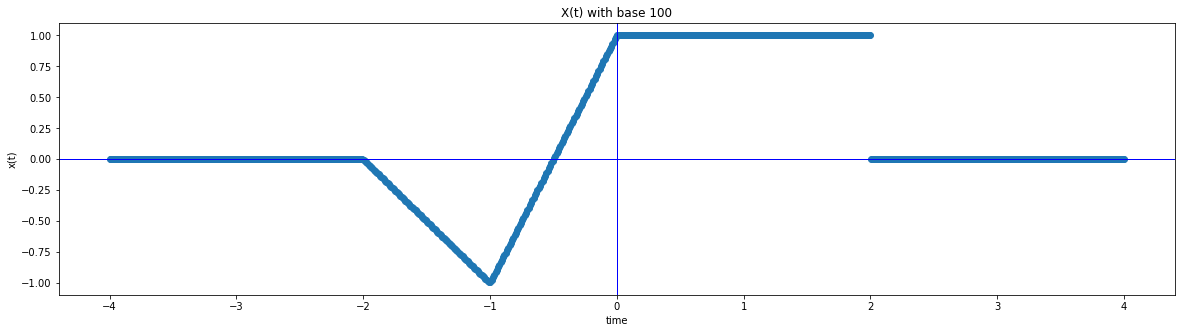

In [3]:
def x(t):
  return (-ramp(t+2) + 3*ramp(t+1) - step(t-2) - 2*ramp(t))

modified_x, modified_y = special_sample(x, 400, 4)
drawer.figure(figsize=(20, 5))
drawer.subplot(1, 1, 1)
draw_plot(drawer, modified_x, modified_y, "X(t) with base 100", "time", "x(t)")

**Part 3:**
Y1(t) function is calculated here. Note that the interval is considered as (-4,4), same as the plot represented in the documentation.
The formula for y1(t) is based of x(t) and is [x (2*t + 2) ]



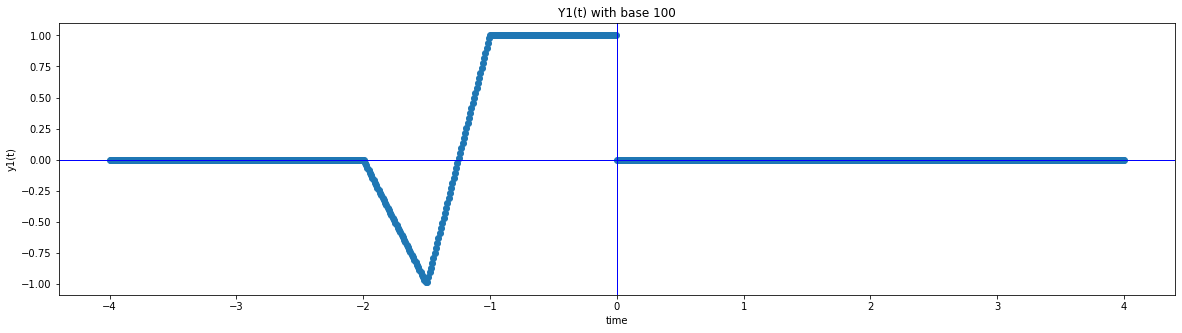

In [4]:
def y1(t):
  return (x(2*t + 2))

modified_x, modified_y = special_sample(y1, 400, 4)
drawer.figure(figsize=(20, 5))
drawer.subplot(1, 1, 1)
draw_plot(drawer, modified_x, modified_y, "Y1(t) with base 100", "time", "y1(t)")

**Part 4:**
Y2(t) function is calculated here. Note that the interval is considered as (-4,4), same as the plot represented in the documentation.
The formula for y2(t) is based of x(t) and is [x (1 - t) ]



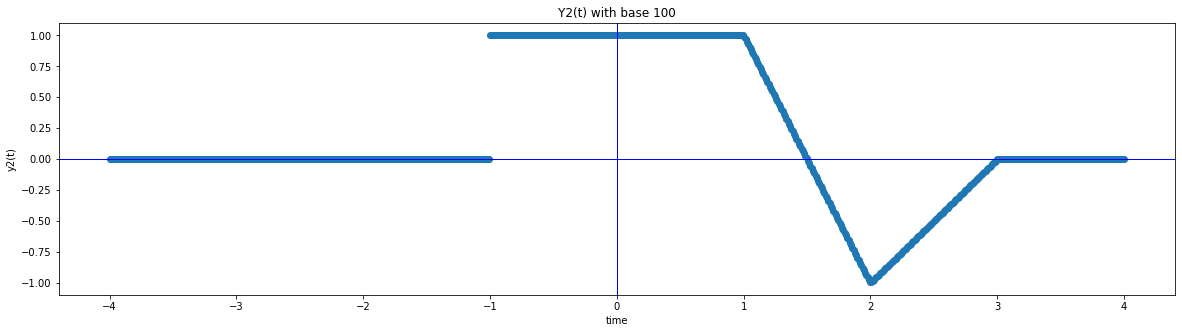

In [5]:
def y2(t):
  return (x(-t + 1))

modified_x, modified_y = special_sample(y2, 400, 4)
drawer.figure(figsize=(20, 5))
drawer.subplot(1, 1, 1)
draw_plot(drawer, modified_x, modified_y, "Y2(t) with base 100", "time", "y2(t)")

## **Second question**

**Part 1:**
Xe and Xo are even and odd parts of function X(t). Xr is only considering the right side of X(t) and Xl is basically representing the left side of X(t). Figures below show implementation of these functions.



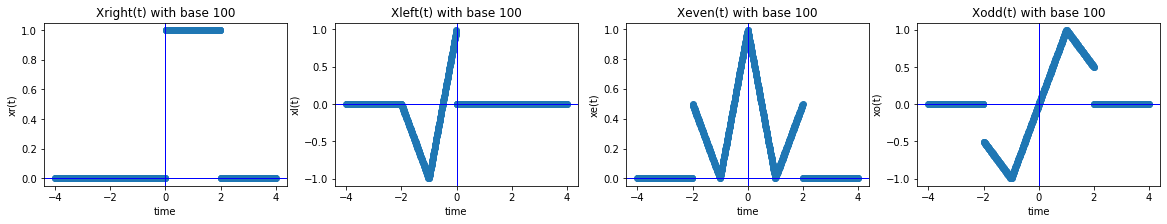

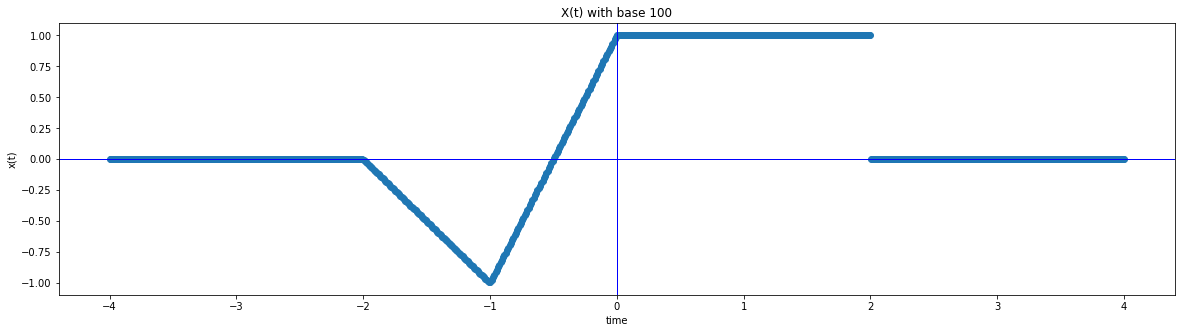

In [6]:
def xr_or_xl(x_inputs,y_outputs, choice):
  modified = []
  if(choice == 'r'):
    key = 1
  else:
    key = -1
  for i in range(len(x_inputs)):
    if((key * x_inputs[i]) > 0):
      modified.append(y_outputs[i])
    else:
      modified.append(0)
  return modified


def xo_or_xe(x_inputs,y_outputs, choice):
  modified = []
  if(choice == 'e'):
    key = 1
  else:
    key = -1
  for i in range(len(x_inputs)):
    element = (y_outputs[i] + key*y_outputs[-i-1])/2
    modified.append(element)
  return modified


drawer.figure(figsize=(20, 3))
x_signal, y_signal = special_sample(x, 400, 4)

modified_y = xr_or_xl(x_signal, y_signal,'r')
drawer.subplot(1, 4, 1)
draw_plot(drawer, x_signal, modified_y, "Xright(t) with base 100", "time", "xr(t)")

modified_y = xr_or_xl(x_signal, y_signal,'l')
drawer.subplot(1, 4, 2)
draw_plot(drawer, x_signal, modified_y, "Xleft(t) with base 100", "time", "xl(t)")

modified_y = xo_or_xe(x_signal, y_signal,'e')
drawer.subplot(1, 4, 3)
draw_plot(drawer, x_signal, modified_y, "Xeven(t) with base 100", "time", "xe(t)")

modified_y = xo_or_xe(x_signal, y_signal,'o')
drawer.subplot(1, 4, 4)
draw_plot(drawer, x_signal, modified_y, "Xodd(t) with base 100", "time", "xo(t)")

drawer.figure(figsize=(20, 5))
draw_plot(drawer, x_signal, y_signal, "X(t) with base 100", "time", "x(t)")
      

**Part 2:**
The answer is yes. Right side of x(t) is made using Xr(t) function and left part is made by subtracting Xr(-t - 1) result from 2*Xe(t). By concatinating the two parts X(t) will be made.



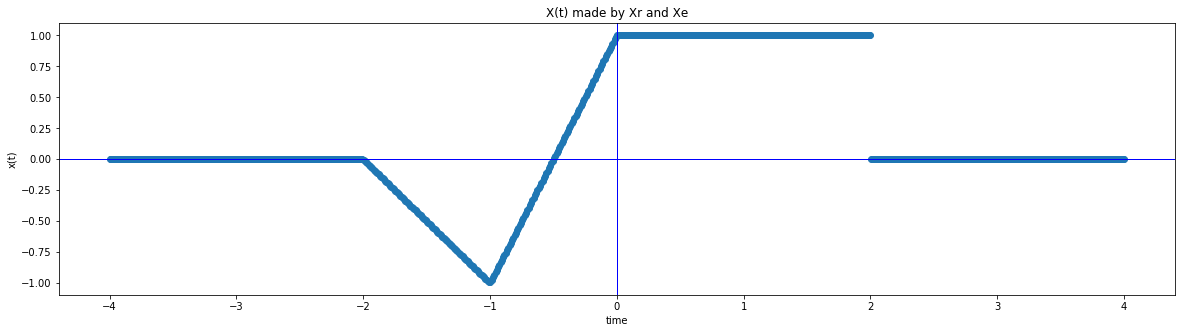

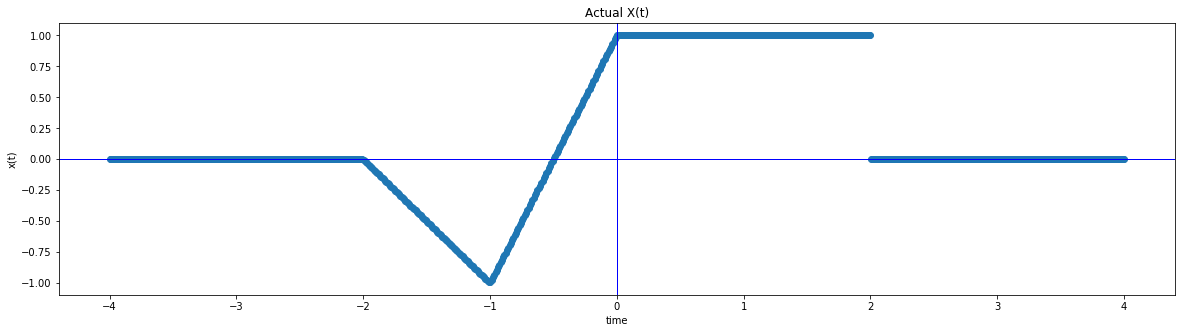

In [9]:
def xr_xe(x_signal, y_signal):
  output = []
  xr_result = xr_or_xl(x_signal, y_signal, 'r')
  xe_result = xo_or_xe(x_signal, y_signal, 'e')
  mid = len(xr_result)/2
  for i in range(len(xr_result)):
    if i < mid:
      output.append(2 * xe_result[i] - xr_result[-i-1])
    else:
      output.append(xr_result[i])
  return output


drawer.figure(figsize=(20, 5))
draw_plot(drawer, x_signal, xr_xe(x_signal, y_signal), "X(t) made by Xr and Xe", "time", "x(t)") 

drawer.figure(figsize=(20, 5))
draw_plot(drawer, x_signal, y_signal, "Actual X(t)", "time", "x(t)")
  

**Part 3:**
The answer is yes. left side of x(t) is made using Xl(t) function and right part is made by adding Xl(-t-1) result from 2*Xo(t). By concatinating the two parts X(t) will be made.



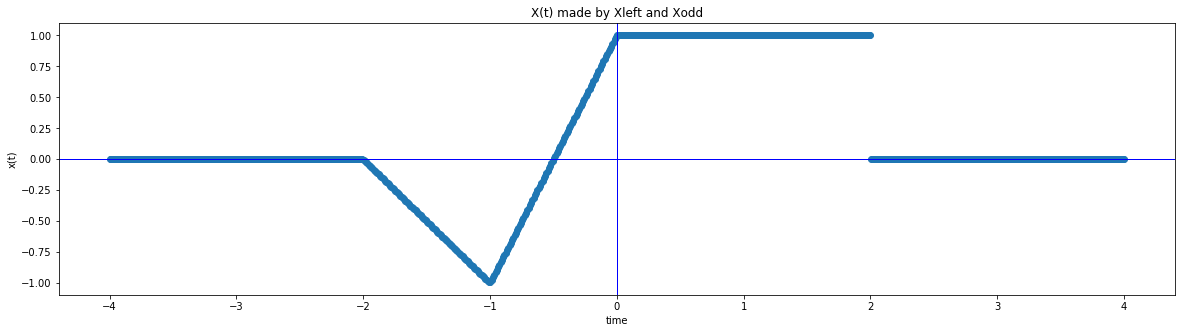

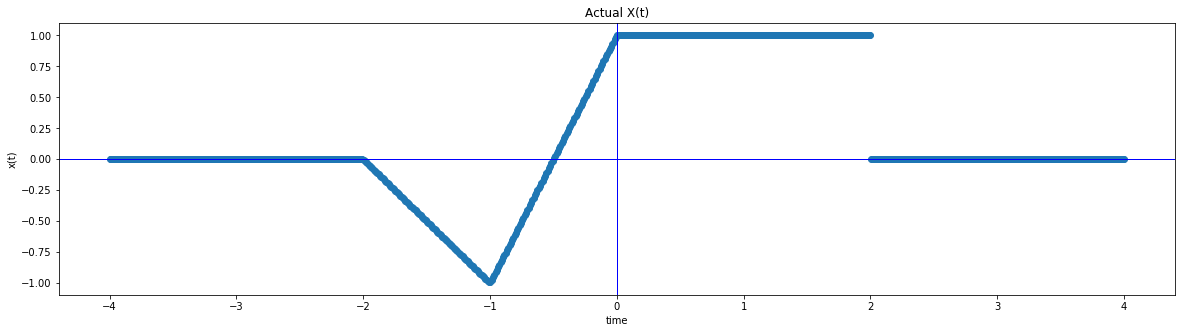

In [13]:
def xo_xl(x_signal, y_signal):
  output = []
  xl_result = xr_or_xl(x_signal, y_signal, 'l')
  xo_result = xo_or_xe(x_signal, y_signal, 'o')
  mid = len(xl_result)/2
  for i in range(len(xl_result)):
    if i < mid:
      output.append(xl_result[i])
    else:
      output.append(2 * xo_result[i] + xl_result[-i-1])
      
  return output

drawer.figure(figsize=(20, 5))
draw_plot(drawer, x_signal, xo_xl(x_signal, y_signal), "X(t) made by Xleft and Xodd", "time", "x(t)") 

drawer.figure(figsize=(20, 5))
draw_plot(drawer, x_signal, y_signal, "Actual X(t)", "time", "x(t)")
  

## **Third question**

**Part 1:**
First of all, x1 and x2 functions are implemented using step function from first question. Then, a1 and a2 are added as coefficients to x1 and x2. Implementation of y(t) is started using "exp" function of numpy. Then we use the integrate library of scipy (quad function) to finalize the result of y(t) Lastly, a sample ranging from -4 to 4 is gathered and both S{a1x1 + a2x2} and S{a1x1} + S{a2x2} are calculated and compared. As you can see below, their results are equal.



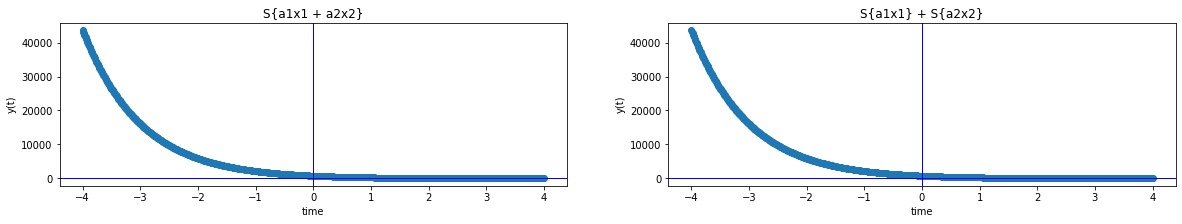

In [0]:
from scipy.integrate import quad
import numpy as np


def step(inp):
    if (inp >= 0):
        return 1
    return 0
  
  
def x(t):
  return (-ramp(t+2) + 3*ramp(t+1) - step(t-2) - 2*ramp(t))  
  
def x1(t):
  return (step(t) - step(t -2))

def a1x1(t):
  return 2 * (x1(t))

def x2(t):
  return (step(t) - step(t - 3))

def a2x2(t):
  return 5 * (x2(t))

def a1a2(t):
  return (a1x1(t) + a2x2(t))

def y_init(u, t, x):
  phase_one = np.exp(-1*(t-u)) * x(u - 2)
  return phase_one

def y_calculate(x, t):
    return quad(y_init, -8, 8, args=(t, x))
  
  
x_signal = np.linspace(-4, 4, 2*400)
first_output = []
second_output = []
for i in range(len(x_signal)):
  first_output.append(y_calculate(a1x1, x_signal[i])[0] + y_calculate(a2x2, x_signal[i])[0])
  second_output.append(y_calculate(a1a2, x_signal[i])[0])

drawer.figure(figsize=(20, 3))

drawer.subplot(1,2,1)
draw_plot(drawer, x_signal, first_output, "S{a1x1 + a2x2}", "time", "y(t)") 
              
drawer.subplot(1,2,2)
draw_plot(drawer, x_signal, second_output, "S{a1x1} + S{a2x2}", "time", "y(t)")              
              
  

**Part 2:**
All the steps are followed as explained above.



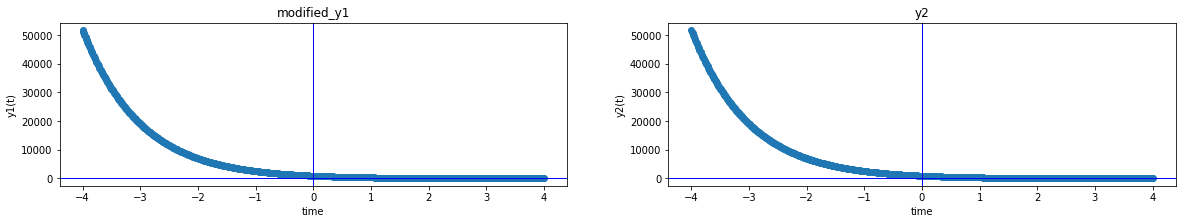

In [0]:
def x1_mofified(t):
  return (step(t - 3) - step(t - 5))


x_signal = np.linspace(-4, 4, 2*400)
modified_y1 = []
y2 = []
for i in range(len(x_signal)):
  modified_y1.append(y_calculate(x1, x_signal[i] - 3)[0]) 
  y2.append(y_calculate(x1_mofified, x_signal[i])[0])

  
drawer.figure(figsize=(20, 3))

drawer.subplot(1,2,1)
draw_plot(drawer, x_signal, modified_y1, "modified_y1", "time", "y1(t)") 
              
drawer.subplot(1,2,2)
draw_plot(drawer, x_signal, y2, "y2", "time", "y2(t)")  


**Part 3:**
As shown above, the system has got all essential characteristics of a LTI system so the answer would be yes.First part proves that the signal is linear and after that  we proved that the signal is time invarient in second part.



## **Fourth question**

**Part 1:**
Implementation of energy functon is provided below.



In [0]:
def energy(inp):
    sum = 0
    for i in inp:
        sum += i**2
    return sum

**Part 2:**
Implementation of energy functon is provided below. By adding a coefficient to the output we will get continues version of signal's energy.That coefficient is the rate of sampling. (100 in our provided code below). The main reason is that by ignoring the coefficient we are just considering energy of avaiable inputs. (the samples gathered in the first place). But by using the coefficient we are also considering those parts that are not included in the sample. Combination of these outputs make the continues signal.





In [0]:
x_values, yx_values = special_sample(x, 400, 4)
x_values, y1_values = special_sample(y1, 400, 4)
x_values, y2_values = special_sample(y2, 400, 4)

print("energy of x(t):", energy(yx_values) / 100)
print("energy of y1(t):", energy(y1_values) / 100)
print("energy of y2(t):", energy(y2_values) / 100)



energy of x(t): 2.6657962628504652
energy of y1(t): 1.3316105394571753
energy of y2(t): 2.6645634953579327


## **Fifth question**

**Part 1:**
The second function is inverted and total output is calculated by two steps. first part contains first half of result and second part represents the second half. Note that before finalizing the result, second part is also inverted as we did in our homeworks.

In [0]:
def convolution(x,h):
  first_half = []
  second_half = []
  result = []
  h.reverse()
  for i in range(len(x)):
    single_sum = 0
    for j in range(i+1):
      single_sum += x[j] * h[-1*(j + 1)]
    first_half.append(single_sum)
    second_half.append(single_sum)
  second_half = second_half[:-1]
  second_half.reverse()
  result = first_half + second_half
  return result



def convolve(first, second, cnv_range):
  def function_inside(n):
    result = 0
    for k in range(-cnv_range, cnv_range):
      result += first[k] * second[n-k]
    return result
  return function_inside


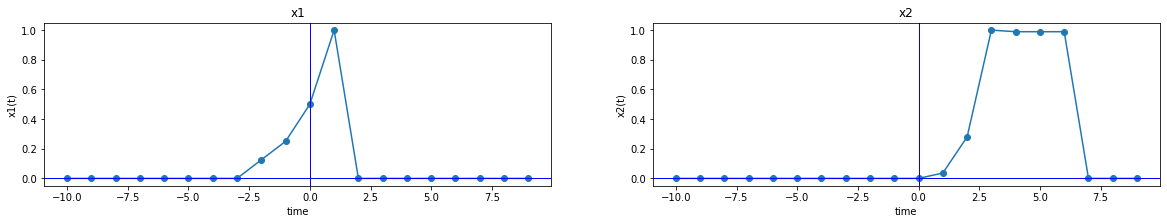

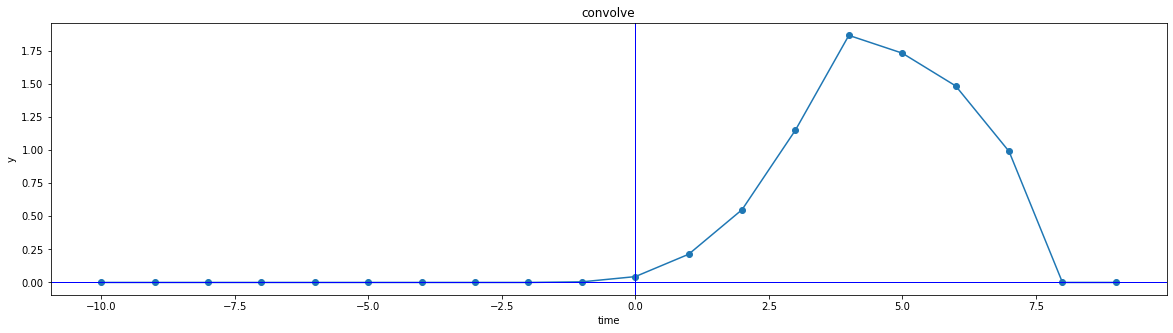

In [16]:
def x1(n):
  return 1/(2**(-n+1))*(step(n+2) - step(n-2))

def x2(n):
  if 0<n<7:
    result = 0
    for i in range(-5, n+1):
      result += (np.sin(2*i)+np.exp(1j*np.pi*i)) * (step(i+3)-step(i-5))
    return abs(result)
  else:
    return 0

drawer.figure(figsize=(20, 3))
x_signal, y1 = special_sample_5(x1, -10, 10)

drawer.subplot(1,2,1)
special_plot(drawer, x_signal, y1, "x1", "time", "x1(t)") 

x_signal, y2 = special_sample_5(x2, -10, 10)              
drawer.subplot(1,2,2)
special_plot(drawer, x_signal, y2, "x2", "time", "x2(t)")

drawer.figure(figsize=(20, 5))

conv = convolve(y1,y2,10)  
x_signal, cnv_output = special_sample_5(conv, -10, 10)            
special_plot(drawer, x_signal, cnv_output, "convolve", "time", "y")

<StemContainer object of 3 artists>

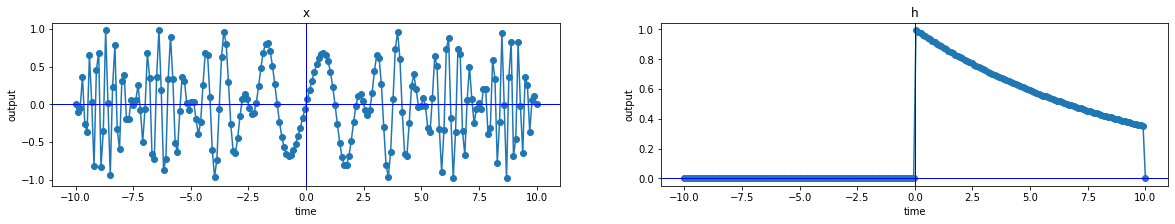

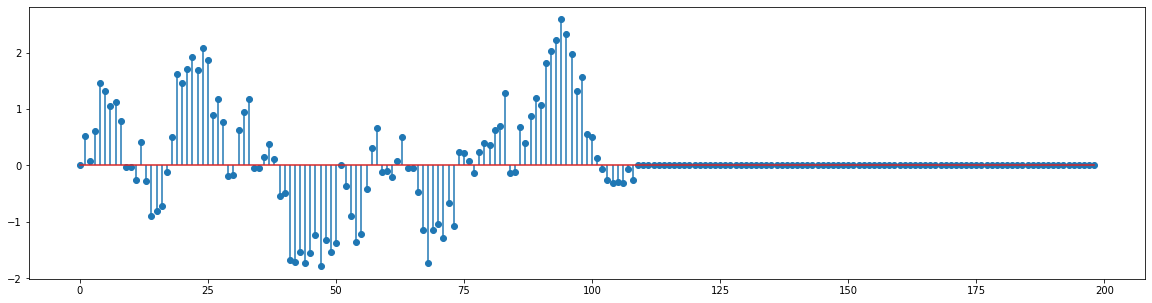

In [27]:
import math
import numpy as np

def x(n):
  return np.cos(n**2) * np.sin(2*np.pi*n/5)
def h(n):
  return 0.9**n * (step(n)-step(n-10))  

x_signal, yx_signal = special_sample(x,100,10)
h_signal, yh_signal = special_sample(h,100,10)
conv_out = np.convolve(list(map(h, list(range(0,100)))), list(map(x, list(range(0,100)))))

drawer.figure(figsize=(20, 3))
drawer.subplot(1,2,1)
special_plot(drawer, x_signal, yx_signal, "x", "time", "output") 

drawer.subplot(1,2,2)
special_plot(drawer, h_signal, yh_signal, "h", "time", "output")

drawer.figure(figsize=(20, 5))
drawer.stem(list(range(0,199)), conv_out, use_line_collection=True)

<StemContainer object of 3 artists>

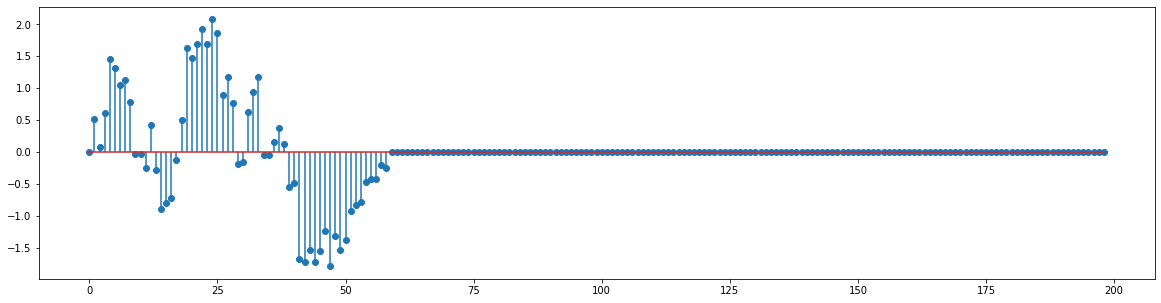

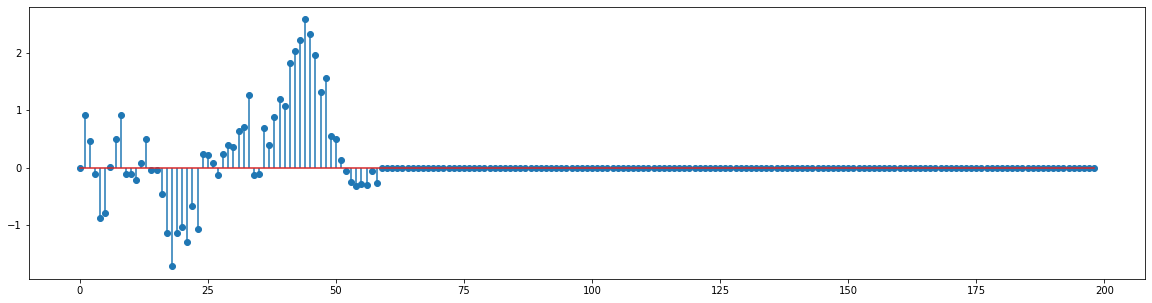

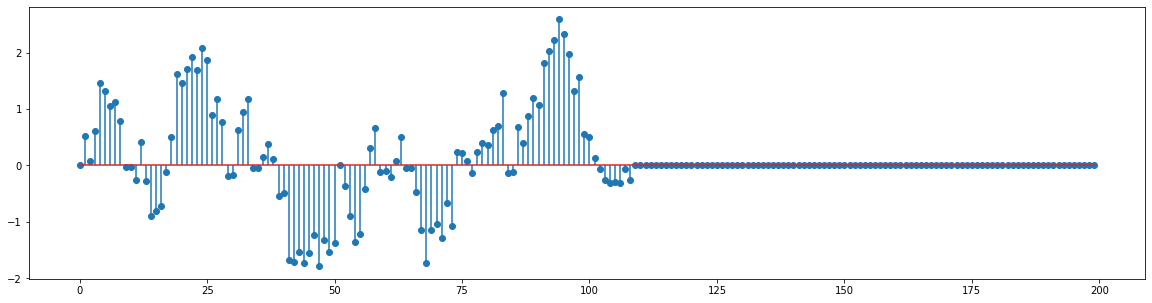

In [43]:
def xright(function, r, L=50):
  def function_inside(n):
    if 0<=n<=L-1:
      return function(n+r*L)
    else:
      return 0
  return function_inside

yo = np.convolve(list(map(h, list(range(0,100)))), list(map(xright(x, 0, 50), list(range(0,100)))))
yl = np.convolve(list(map(h, list(range(0,100)))), list(map(xright(x, 1, 50), list(range(0,100)))))

drawer.figure(figsize=(20, 5))
drawer.stem(list(range(0,199)), yo, use_line_collection=True)

drawer.figure(figsize=(20, 5))
drawer.stem(list(range(0,199)), yl, use_line_collection=True)

y = [0] * 200 
for i in range(200):
  if(i < 50):
    y[i] = yo[i]
  elif(50<=i<=100):
    y[i] = yo[i] + yl[i-50]
  else:
    y[i] = yl[i-50]

drawer.figure(figsize=(20, 5))
drawer.stem(list(range(0,200)), y, use_line_collection=True) 